<a href="https://colab.research.google.com/github/shibanidsai/MLOPS/blob/main/Active_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Re-import required libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import entropy

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
vectorizer.fit(train["review"])
X_train = vectorizer.transform(train["review"])
X_pool = vectorizer.transform(test["review"])
y_train = train['sentiment']

# Train an initial logistic regression model
model = LogisticRegression()
model.fit(X_train, train['sentiment'])

LogisticRegression()

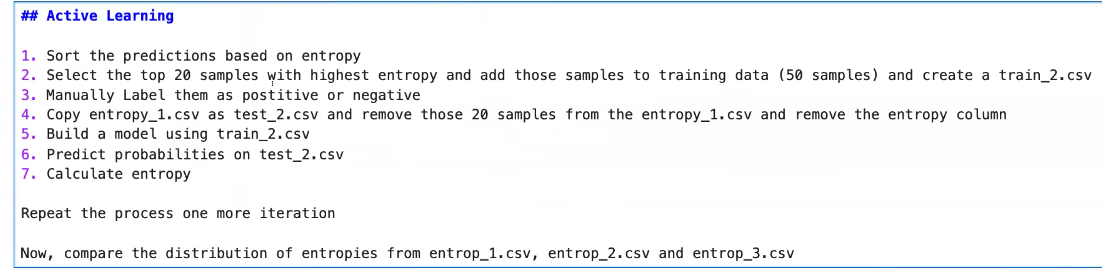

in above we select top 20 highest entropy as they have least probability so we take low probaility samples and ourself label them.they have least probaility as they are different from existing train sample so we use oracle labelling i.e human labelling


In [5]:
# Predict probabilities on the unlabeled pool
probs = model.predict_proba(X_pool)

# Compute entropy for each prediction
entropies = entropy(probs.T)  # Transpose to match expected format

entropy_df = pd.DataFrame({"review": test["review"], "probs" : probs[:, 1], "entropy": entropies})
entropy_df.to_csv("entropy_1.csv", index = False)

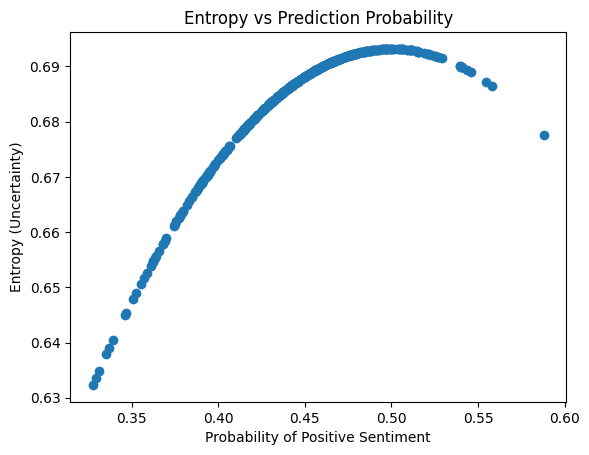

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("entropy_1.csv")

plt.figure()
plt.scatter(df["probs"], df["entropy"])
plt.xlabel("Probability of Positive Sentiment")
plt.ylabel("Entropy (Uncertainty)")
plt.title("Entropy vs Prediction Probability")
plt.show()


Iteration 2


In [14]:
from google.colab import files
uploaded = files.upload()

Saving train1.csv to train1 (1).csv


In [15]:
from google.colab import files
uploaded = files.upload()

Saving test1.csv to test1 (1).csv


In [16]:
train1 = pd.read_csv("train1.csv")
test1 = pd.read_csv("test1.csv")

In [17]:
# Convert text to numerical features using TF-IDF
#make sure you change to model1 in second iteration
vectorizer = TfidfVectorizer()
vectorizer.fit(train1["review"])
X_train1 = vectorizer.transform(train1["review"])
X_pool1 = vectorizer.transform(test1["review"])
y_train1 = train1['sentiment']

# Train an initial logistic regression model
model1 = LogisticRegression()
model1.fit(X_train1, train1['sentiment'])

LogisticRegression()

In [19]:
# Predict probabilities on the unlabeled pool
probs1 = model1.predict_proba(X_pool1)

# Compute entropy for each prediction
entropies = entropy(probs1.T)  # Transpose to match expected format

entropy_df = pd.DataFrame({"review": test1["review"], "probs" : probs1[:, 1], "entropy": entropies})
entropy_df.to_csv("entropy_2.csv", index = False)

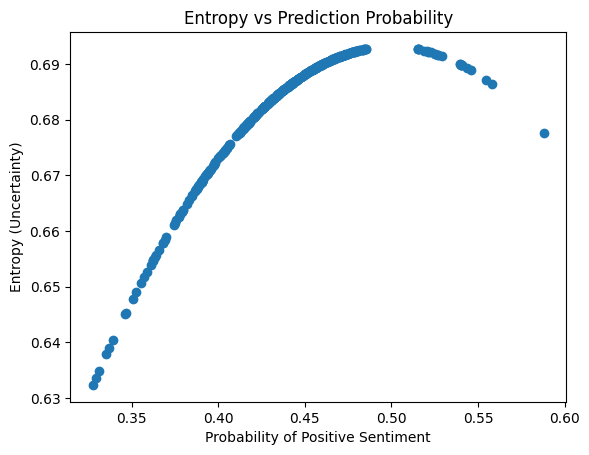

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("entropy_2.csv")

plt.figure()
plt.scatter(df1["probs"], df1["entropy"])
plt.xlabel("Probability of Positive Sentiment")
plt.ylabel("Entropy (Uncertainty)")
plt.title("Entropy vs Prediction Probability")
plt.show()


3rd iteration


In [1]:
from google.colab import files
uploaded = files.upload()

Saving train2.csv to train2.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test2.csv to test2.csv


In [5]:
train2 = pd.read_csv("train2.csv")
test2 = pd.read_csv("test2.csv")

In [7]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
vectorizer.fit(train2["review"])
X_train2 = vectorizer.transform(train2["review"])
X_pool2 = vectorizer.transform(test2["review"])
y_train2 = train2['sentiment']

# Train an initial logistic regression model
model2 = LogisticRegression()
model2.fit(X_train2, train2['sentiment'])

LogisticRegression()

In [8]:
# Predict probabilities on the unlabeled pool
probs2 = model2.predict_proba(X_pool2)

# Compute entropy for each prediction
entropies = entropy(probs2.T)  # Transpose to match expected format

entropy_df = pd.DataFrame({"review": test2["review"], "probs" : probs2[:, 1], "entropy": entropies})
entropy_df.to_csv("entropy_3.csv", index = False)

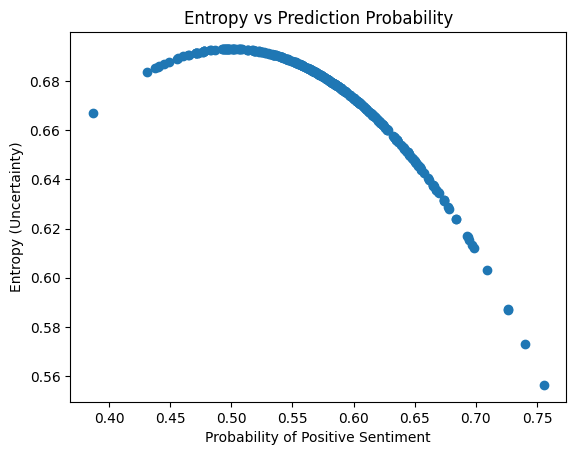

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv("entropy_3.csv")

plt.figure()
plt.scatter(df2["probs"], df2["entropy"])
plt.xlabel("Probability of Positive Sentiment")
plt.ylabel("Entropy (Uncertainty)")
plt.title("Entropy vs Prediction Probability")
plt.show()

“Across active learning iterations, the entropy–probability curve flattens and spreads outward, showing reduced uncertainty and increased model confidence as informative samples are labeled.”

For iteration 2 graph— 2nd iteration of Active Learning
What you see

Probabilities are mostly between 0.33 → 0.58

Highest entropy peak is around 0.48–0.50

Entropy values are tightly clustered around 0.63–0.69

What this says about your model

👉 The model is still quite uncertain overall
Very few points near 0 or 1 → model lacks strong confidence

Many points near 0.45–0.5 → lots of ambiguous reviews

High entropy plateau → decision boundary is still fuzzy


for iteraton3

Probabilities now stretch wider: 0.40 → 0.75

Entropy peak is still near 0.5

Right side entropy drops sharply as probability increases

More points far from 0.5 → stronger confidence

Entropy decreases faster on the right → positive class becoming clearer

Distribution spreads out → better separation of classes